## Data/MC Comparison for Brem-Induced Clusters

#### Comparison of Clusters in Data vs MC. This is to validate the signal reconstruction process. We compare cluster from Z->MuMu events in Data vs those from a DY->ZMuMu (50-120 GeV for MLL). Data is from 2023B&C, and MC is from the preBPix, normalized to the appropriate value 

In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT as rt
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector
import os

Warning in <TInterpreter::ReadRootmapFile>: class  HepMC::FourVector found in libSimDataFormatsGeneratorProducts.so  is already in libHepMC3rootIO.so 


Welcome to JupyROOT 6.28/00


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  r

In [2]:
#import helper modules for muon scale factor computation
sys.path.append("/storage/af/user/aalbert/CMSSW_14_1_0_pre4/src/RazorCommon_correctionslib/RazorCommon/Tools/bin")
import importlib
import getMuonScaleFactor

#### Load ntuples as awkward arrays

In [3]:
ak.behavior.update(candidate.behavior)

def getLZDF(f,nEvents=-1,version="new"): #lazy dataframe with events that have cluster matched to probe muon
    events_raw = uproot.open(f)['MuonSystem']
    df = coffea.processor.LazyDataFrame(events_raw,entrystop=nEvents)
    start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
    events = uproot.lazy(df._tree)
    #events = events[start:stop]
    return events

In [4]:
#paths
MC_paths = {"2022":"/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/MC/MC_Summer22/DYto2Mu_MLL-50to120_keepMDSHits_Merged/DYto2Mu_MLL-50to120_keepMDSHits_7311pb_weighted.root",
            "2022EE":"/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/MC/MC_Summer22EE/DYto2Mu_MLL-50to120_keepMDSHits_Merged/DYto2Mu_MLL-50to120_keepMDSHits_26642pb_weighted.root",
            "2023":"/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/MC/MC_Summer23/DYto2Mu_MLL-50to120_Merged/DYto2Mu_MLL-50to120_18411pb_weighted.root",
            "2023BPix":"/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/MC/MC_Summer23BPix/DYto2Mu_MLL-50to120_Merged/DYto2Mu_MLL-50to120_9451pb_weighted.root",
           "2024":"/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/MC/MC_Summer24/DYto2Mu_MLL-50to120_Merged/DYto2Mu_MLL-50to120_54540pb_weighted.root"}

data_path_lists = {"2022":["/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2022_Merged/Muon_Run2022C_PromptReco-v1_goodLumi.root",
                          "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2022_Merged/Muon_Run2022D_PromptReco-v1_goodLumi.root"],
                 
                   "2022EE":["/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2022_Merged/Muon_Run2022E_PromptReco-v1_goodLumi.root",
                          "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2022_Merged/Muon_Run2022F_PromptReco-v1_goodLumi.root",
                            "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2022_Merged/Muon_Run2022G_PromptReco-v1_goodLumi.root"],
                   
                    "2023":["/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023B_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023B_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023C_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023C_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023C_PromptReco-v2_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023C_PromptReco-v2_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023C_PromptReco-v3_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023C_PromptReco-v3_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023C_PromptReco-v4_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023C_PromptReco-v4_goodLumi.root"],
                  
                      "2023BPix":["/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023D_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023D_PromptReco-v1_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon0_Run2023D_PromptReco-v2_goodLumi.root",
                     "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2023_Merged/Muon1_Run2023D_PromptReco-v2_goodLumi.root"],
                       
                    "2024":["/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024B-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024C-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024D-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024E-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024E-PromptReco-v2-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024F-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024G-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024H-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024I-PromptReco-v1-AOD_goodLumi.root",
                    "/storage/af/user/aalbert/CMSSW_10_6_20/src/run3_llp_analyzer/output_nTuples/Data/2024_Merged/Muon0-Run2024I-PromptReco-v2-AOD_goodLumi.root"]
                      
                             }

In [5]:
events_MC_full_dict= {}
for campaign, MC_path in MC_paths.items():
    print(campaign)
    if "2024"==campaign:continue
    events_MC_full = getLZDF(MC_path)
    events_MC_full = events_MC_full[events_MC_full.nCscRechitClusters>0]
    events_MC_full = events_MC_full[np.logical_and(events_MC_full.ZMass>50, events_MC_full.ZMass<120)]
    events_MC_full = events_MC_full[events_MC_full.Flag_all]
    events_MC_full = events_MC_full[events_MC_full.Flag_ecalBadCalibFilter]
    events_MC_full = events_MC_full[events_MC_full.jetVeto]
    events_MC_full_dict[campaign] = events_MC_full
    
events_data_full_dict= {}
for campaign, data_path_list in data_path_lists.items():
    print(campaign)
    if "2024"==campaign:continue
    #if "2022" in campaign:continue
    data_events = [getLZDF(data_path) for data_path in data_path_list]
    events_data_full = ak.concatenate(data_events, axis=0)
    events_data_full = events_data_full[events_data_full.nCscRechitClusters>0]
    events_data_full = events_data_full[np.logical_and(events_data_full.ZMass>50, events_data_full.ZMass<120)]
    events_data_full = events_data_full[events_data_full.Flag_all]
    events_data_full = events_data_full[events_data_full.Flag_ecalBadCalibFilter]
    events_data_full = events_data_full[events_data_full.jetVeto]
    events_data_full_dict[campaign] = events_data_full

2022
2022EE
2023
2023BPix
2024
2022
2022EE
2023
2023BPix
2024


In [6]:
MC_kFactors = {"2022":1,"2022EE":0.8425135156354998,"2023":0.9287192347533128,"2023BPix":0.9470132857601179, "2024":1}

### modify the input ntuples so that each entry corresponds with a cluster. As a result, some entries will be repeated twice (tne ones denoted "branch names") if there are two clusters in the event. At this step, all of the branches that we compute for the measurement should be included

In [7]:
#define cluster level csc branches needed
# csc_branches = []; csc_chamber_hit_branches = []
# for branch_name in events_MC_full.fields: 
#     if "csc" in branch_name and "dt" not in branch_name and "LLP" not in branch_name and "DNN" not in branch_name:
#         csc_branches.append(branch_name)
#     if "cscRechitClusterNRechit" in branch_name:
#         csc_chamber_hit_branches.append(branch_name)
# csc_chamber_hit_branches = np.array(csc_chamber_hit_branches)
# ME11MinusIndex = np.where(csc_chamber_hit_branches=="cscRechitClusterNRechitChamberMinus11")[0]
# ME12MinusIndex = np.where(csc_chamber_hit_branches=="cscRechitClusterNRechitChamberMinus12")[0]
# ME11PlusIndex = np.where(csc_chamber_hit_branches=="cscRechitClusterNRechitChamberPlus11")[0]
# ME12PlusIndex = np.where(csc_chamber_hit_branches=="cscRechitClusterNRechitChamberPlus12")[0]

# forward_chamber_field_indices = [ME11MinusIndex, ME12MinusIndex, ME11PlusIndex, ME12PlusIndex]
# #event-level branches     
#csc_branches = []
branch_names = ["weight", "pileupWeight", "ZMass"]


In [8]:
csc_branches = ['cscRechitClusterTimeWeighted','cscRechitClusterTimeSpreadWeightedAll','cscRechitClusterNStation10',
               'cscRechitClusterNRechitChamberPlus11','cscRechitClusterNRechitChamberPlus12','cscRechitClusterNRechitChamberMinus11',
               'cscRechitClusterNRechitChamberMinus12', 'cscRechitClusterSize', 'cscRechitClusterPhi', 'cscRechitClusterEta', 
                'cscRechitCluster_matchToMuon1', 'cscRechitCluster_matchToMuon2', 'cscRechitCluster_matchToProbeMuon']

In [9]:
def getSF(campaign, pt, eta):
    if campaign=="2022":
        MC_SF_LooseID = getMuonScaleFactor.getLooseIDEffArr_preEE(pt, eta)
        MC_SF_LooseISO = getMuonScaleFactor.getLooseISOEffArr_preEE(pt, eta)
        MC_SF_TightID = getMuonScaleFactor.getTightIDEffArr_preEE(pt, eta)
        MC_SF_TightISO = getMuonScaleFactor.getTightISOEffArr_preEE(pt, eta)
        MC_SF_HLT = getMuonScaleFactor.getHLTEffArr_preEE(pt, eta)
    elif campaign=="2022EE":
        MC_SF_LooseID = getMuonScaleFactor.getLooseIDEffArr_EE(pt, eta)
        MC_SF_LooseISO = getMuonScaleFactor.getLooseISOEffArr_EE(pt, eta)
        MC_SF_TightID = getMuonScaleFactor.getTightIDEffArr_EE(pt, eta)
        MC_SF_TightISO = getMuonScaleFactor.getTightISOEffArr_EE(pt, eta)
        MC_SF_HLT = getMuonScaleFactor.getHLTEffArr_EE(pt, eta)
    elif campaign=="2023":
        MC_SF_LooseID = getMuonScaleFactor.getLooseIDEffArr_preBPix(pt, eta)
        MC_SF_LooseISO = getMuonScaleFactor.getLooseISOEffArr_preBPix(pt, eta)
        MC_SF_TightID = getMuonScaleFactor.getTightIDEffArr_preBPix(pt, eta)
        MC_SF_TightISO = getMuonScaleFactor.getTightISOEffArr_preBPix(pt, eta)
        MC_SF_HLT = getMuonScaleFactor.getHLTEffArr_preBPix(pt, eta)
    elif campaign=="2023BPix" or campaign=="2024":
        MC_SF_LooseID = getMuonScaleFactor.getLooseIDEffArr_BPix(pt, eta)
        MC_SF_LooseISO = getMuonScaleFactor.getLooseISOEffArr_BPix(pt, eta)
        MC_SF_TightID = getMuonScaleFactor.getTightIDEffArr_BPix(pt, eta)
        MC_SF_TightISO = getMuonScaleFactor.getTightISOEffArr_BPix(pt, eta)
        MC_SF_HLT = getMuonScaleFactor.getHLTEffArr_BPix(pt, eta)
    else:
        print("invalid campaign. exiting...")
        exit()
    return MC_SF_LooseID, MC_SF_LooseISO, MC_SF_TightID, MC_SF_TightISO, MC_SF_HLT

In [10]:
#make more useful input awkward array, with all information in cluster-level format
def getClusterBranches(LZDF, campaign, isMC=False):
    new_df = ak.zip({field: ak.flatten(LZDF[field]) for field in csc_branches})
    
    #compute cluster max chamber
#     hits_by_chamber = np.stack([ak.flatten(LZDF[branch]) for branch in csc_chamber_hit_branches], axis=1)
#     #print(hits_by_chamber)
#     #print(np.array(hits_by_chamber).shape)
#     maxBranchIndex = np.argmax(hits_by_chamber, axis=1)
#     #print(maxBranchIndex)
#     chamber_masks_lists = []
#     for chamber_index in forward_chamber_field_indices:
#         chamber_masks_lists.append((maxBranchIndex==chamber_index))
#         #print(np.where(maxBranchIndex==chamber_index))
#     #print(np.stack(chamber_masks_lists, axis=1))
#     new_df = ak.with_field(new_df, np.any(np.stack(chamber_masks_lists, axis=1), axis=1), "forward_max_chamber")
    
    print("finished csc branches")
    newDNN = ak.flatten(ak.mask(LZDF["cscRechitClusterDNN_bkgMC_plusBeamHalo"], LZDF["cscRechitClusterDNN_bkgMC_plusBeamHalo"]>0))
    newDNN = newDNN[~ak.is_none(newDNN)]
    new_df = ak.with_field(new_df, newDNN, "cscRechitClusterDNN_bkgMC_plusBeamHalo")
    
    for branch in branch_names:
        if (not isMC) and (branch in ["weight", "pileupWeight"]):
            continue
        new_df = ak.with_field(new_df, np.repeat(LZDF[branch],LZDF["nCscRechitClusters"]), branch)

    
    column_indices_probe = np.array(ak.flatten(ak.values_astype(LZDF["cscRechitCluster_matchToMuon2"], int)))
    column_indices_tag = np.array(ak.flatten(ak.values_astype(LZDF["cscRechitCluster_matchToMuon1"], int)))
    row_indices = np.arange(np.size(column_indices_probe), dtype=int)
    
    #compute 
    if isMC:
        MC_SF_LooseID, MC_SF_LooseISO, MC_SF_TightID, MC_SF_TightISO, MC_SF_HLT = getSF(campaign, np.array(LZDF.lepPt), np.array(LZDF.lepEta))
        
        MC_SF_LooseID = np.repeat(MC_SF_LooseID,np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_probe]
        MC_SF_LooseISO = np.repeat(np.array(MC_SF_LooseISO),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_probe]
        MC_SF_TightID = np.repeat(MC_SF_TightID,np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
        MC_SF_TightISO = np.repeat(MC_SF_TightISO,np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
        MC_SF_HLT = np.repeat(MC_SF_HLT,np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
        
        MC_Weight_Total = new_df["weight"]*new_df["pileupWeight"]*MC_SF_LooseID*MC_SF_LooseISO*MC_SF_TightID*MC_SF_TightISO*MC_SF_HLT*MC_kFactors[campaign]
        new_df = ak.with_field(new_df, MC_Weight_Total, "weight_total")
    
    print("at muon variables")
    
    #load pT, eta, and phi for tag and probe muons
#     probe_pT = np.repeat(np.array(LZDF["lepPt"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_probe]
#     probe_eta = np.repeat(np.array(LZDF["lepEta"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_probe]
#     probe_phi = np.repeat(np.array(LZDF["lepPhi"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_probe]
    
#     tag_pT = np.repeat(np.array(LZDF["lepPt"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
#     tag_eta = np.repeat(np.array(LZDF["lepEta"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
#     tag_phi = np.repeat(np.array(LZDF["lepPhi"]),np.array(LZDF["nCscRechitClusters"]), axis=0)[row_indices,column_indices_tag]
    
#     new_df = ak.with_field(new_df, probe_pT, "probe_pT")
#     new_df = ak.with_field(new_df, probe_eta, "probe_eta")
#     new_df = ak.with_field(new_df, probe_phi, "probe_phi")
    
#     new_df = ak.with_field(new_df, tag_pT, "tag_pT")
#     new_df = ak.with_field(new_df, tag_eta, "tag_eta")
#     new_df = ak.with_field(new_df, tag_phi, "tag_phi")
    
#     #deltaR(cluster, muon)
    #new_df = ak.with_field(new_df, np.sqrt((new_df["cscRechitClusterEta"]-new_df["probe_eta"])**2+(new_df["cscRechitClusterPhi"]-new_df["probe_phi"])**2), "cscRechitClusterMuonDeltaR")
    
#     #DNN inputs - hit fractions in stations/rings
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus11+new_df.cscRechitClusterNRechitChamberMinus11+new_df.cscRechitClusterNRechitChamberPlus12+new_df.cscRechitClusterNRechitChamberMinus12+new_df.cscRechitClusterNRechitChamberPlus13+new_df.cscRechitClusterNRechitChamberMinus13)/new_df.cscRechitClusterSize, "cscRechitClusterFracS1")
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus21+new_df.cscRechitClusterNRechitChamberMinus21+new_df.cscRechitClusterNRechitChamberPlus22+new_df.cscRechitClusterNRechitChamberMinus22)/new_df.cscRechitClusterSize, "cscRechitClusterFracS2")
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus31+new_df.cscRechitClusterNRechitChamberMinus31+new_df.cscRechitClusterNRechitChamberPlus32+new_df.cscRechitClusterNRechitChamberMinus32)/new_df.cscRechitClusterSize, "cscRechitClusterFracS3")
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus41+new_df.cscRechitClusterNRechitChamberMinus41+new_df.cscRechitClusterNRechitChamberPlus42+new_df.cscRechitClusterNRechitChamberMinus42)/new_df.cscRechitClusterSize, "cscRechitClusterFracS4")

#     new_df = ak.with_field(new_df,(new_df.cscRechitClusterNRechitChamberPlus11+new_df.cscRechitClusterNRechitChamberMinus11+new_df.cscRechitClusterNRechitChamberPlus21+new_df.cscRechitClusterNRechitChamberMinus21+new_df.cscRechitClusterNRechitChamberPlus31+new_df.cscRechitClusterNRechitChamberMinus31+new_df.cscRechitClusterNRechitChamberPlus41+new_df.cscRechitClusterNRechitChamberMinus41)/new_df.cscRechitClusterSize, "cscRechitClusterFracR1")
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus12+new_df.cscRechitClusterNRechitChamberMinus12+new_df.cscRechitClusterNRechitChamberPlus22+new_df.cscRechitClusterNRechitChamberMinus22+new_df.cscRechitClusterNRechitChamberPlus32+new_df.cscRechitClusterNRechitChamberMinus32+new_df.cscRechitClusterNRechitChamberPlus42+new_df.cscRechitClusterNRechitChamberMinus42)/new_df.cscRechitClusterSize, "cscRechitClusterFracR2")
#     new_df = ak.with_field(new_df, (new_df.cscRechitClusterNRechitChamberPlus13+new_df.cscRechitClusterNRechitChamberMinus13)/new_df.cscRechitClusterSize, "cscRechitClusterFracR3")
    
    #forward hits branch
    new_df = ak.with_field(new_df, new_df.cscRechitClusterNRechitChamberPlus11+new_df.cscRechitClusterNRechitChamberMinus11+new_df.cscRechitClusterNRechitChamberPlus12 + new_df.cscRechitClusterNRechitChamberMinus12, "forward_hits")
    return new_df

In [12]:
events_MC_dict = {}; events_data_dict = {}
for campaign in list(events_data_full_dict.keys()):
    print(campaign)
    #if campaign=="2022":continue
    print("MC")
    events_MC = getClusterBranches(events_MC_full_dict[campaign], campaign, True)
    #print("now data")
    events_data = getClusterBranches(events_data_full_dict[campaign], campaign, False)
    events_MC_dict[campaign] = events_MC
    events_data_dict[campaign] = events_data

2022
MC
finished csc branches
at muon variables
finished csc branches
at muon variables
2022EE
MC
finished csc branches
at muon variables
finished csc branches
at muon variables
2023
MC
finished csc branches
at muon variables
finished csc branches
at muon variables
2023BPix
MC
finished csc branches
at muon variables
finished csc branches
at muon variables


### Code to Mask Data According to Specific Cuts - Low MET and High MET, along with cutflows

In [13]:
def makeForwardVetoMask(events, mask, forwardVetoList: list=[]):
    forwardMask = mask
    if "forward_veto" in forwardVetoList:
        forwardMask = ak.mask(forwardMask, events.forward_hits==0)
    if "forward_veto_mod" in forwardVetoList:
        forwardMask = ak.mask(forwardMask, events.forward_max_chamber==False)
    if "forward_veto_highMET" in forwardVetoList:
        forwardMask = ak.mask(forwardMask, (events.cscRechitClusterNRechitChamberPlus11+events.cscRechitClusterNRechitChamberMinus11)/events.cscRechitClusterSize<1)
    return forwardMask

In [14]:
def makeEventMask(campaign, events, noMaskList: list=[], forwardVetoMaskList: list=[], noCuts=False, invertHotspot=False):
    mask = events.cscRechitCluster_matchToProbeMuon
    mask = makeForwardVetoMask(events, mask, forwardVetoMaskList)
    #mask out hotspot automatically
#     if campaign=="2023":
#         #remove clusters with abs(phi)>2.8 or -0.3<phi<0.5 with eta<-1.9 and Z<-780 (i.e. negative inner ring)
#         hotspotMask = np.all([np.logical_or(np.logical_and(events.cscRechitClusterPhi>-0.3, events.cscRechitClusterPhi<0.6),np.abs(events.cscRechitClusterPhi)>2.8), events.cscRechitClusterEta<-1.9, events.cscRechitClusterZ<-780],axis=0)
#     elif campaign=="2023BPix":
#          #remove clusters with abs(phi)>2.8 or -0.3<phi<0.5 with eta<-1.9 and Z<-780 (i.e. negative inner ring)
#         hotspotMask_neg = np.all([np.logical_or(np.logical_and(events.cscRechitClusterPhi>-0.3, events.cscRechitClusterPhi<0.6),np.abs(events.cscRechitClusterPhi)>2.8), events.cscRechitClusterEta<-1.9, events.cscRechitClusterZ<-780],axis=0)
#         hotspotMask_pos = np.all([events.cscRechitClusterPhi>0.8,events.cscRechitClusterPhi<1.2, events.cscRechitClusterEta>1.9],axis=0)
#         hotspotMask = np.logical_or(hotspotMask_pos, hotspotMask_neg)
#     elif campaign=="2022":
#         #remove clusters with 1.5<phi<1.7, 1<eta<1.4, and Z>780 (positive inner ring) in positive endcap
#         #remove clusters with abs(phi)>2.8 or 1.7<phi<2.1 with eta<-1.9 and Z<-780 (i.e. negative inner ring)
#         hotspotMask_pos = np.all([events.cscRechitClusterPhi>1.5, events.cscRechitClusterPhi<1.7,events.cscRechitClusterEta>1,events.cscRechitClusterEta<1.6, events.cscRechitClusterZ>780],axis=0)
#         hotspotMask_neg = np.all([np.logical_or(np.logical_and(events.cscRechitClusterPhi>1.7, events.cscRechitClusterPhi<2.1),np.abs(events.cscRechitClusterPhi)>2.8), events.cscRechitClusterEta<-1.6, events.cscRechitClusterZ<-780],axis=0)
#         hotspotMask = np.logical_or(hotspotMask_pos, hotspotMask_neg)
#         #hotspotMask = hotspotMask_pos
#     elif campaign=="2022EE":
#         #same positive endcap mask as 2022
#         #remove clusters with abs(phi)>2.8 or -1.5<phi<-1.7 or 0.4<phi<0.6 with eta<-1.9 and Z<-780 (i.e. negative inner ring)
#         hotspotMask_pos = np.all([events.cscRechitClusterPhi>1.5, events.cscRechitClusterPhi<1.7,events.cscRechitClusterEta>1,events.cscRechitClusterEta<1.4, events.cscRechitClusterZ>780],axis=0)
#         hotspotMask_neg = np.all([np.any([np.logical_and(events.cscRechitClusterPhi>-1.5, events.cscRechitClusterPhi<-1.3),np.abs(events.cscRechitClusterPhi)>2.8,np.logical_and(events.cscRechitClusterPhi>0.4, events.cscRechitClusterPhi<0.6)], axis=0), events.cscRechitClusterEta<-1.9, events.cscRechitClusterZ<-780],axis=0)
#         hotspotMask = np.logical_or(hotspotMask_pos, hotspotMask_neg)
#     else: 
#         print("no/invalid campaign specified, exiting")
#         exit()
#     if invertHotspot:hotspotMask=np.logical_not(hotspotMask)
#     mask=ak.mask(mask, np.logical_not(hotspotMask))
    #mask=ak.mask(mask, np.logical_or(np.logical_and(np.logical_or(events.cscRechitClusterPhi<-0.3,events.cscRechitClusterPhi>0.6),abs(events.cscRechitClusterPhi)<2.8), events.cscRechitClusterEta>-1.9))
    if noCuts:
        return mask
    if "timespread_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterTimeSpreadWeightedAll<20)
    if "time_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterTimeWeighted<12.5)
        mask = ak.mask(mask, events.cscRechitClusterTimeWeighted>-5)
    if "DNN_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterDNN_bkgMC_plusBeamHalo>0.96)
    if "clusterSize_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterSize>160)
    if "NStation10_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterNStation10>1)
    return mask

In [15]:
def makeEventMaskHighMET(events, noMaskList: list=[], forwardVetoMaskList: list=[], noCuts=False):
    mask = events.cscRechitCluster_matchToProbeMuon
    mask = makeForwardVetoMask(events, mask, forwardVetoMaskList)
    #mask out hotspot automatically
    mask=ak.mask(mask, np.logical_or(np.logical_and(np.logical_or(events.cscRechitClusterPhi<-0.3,events.cscRechitClusterPhi>0.6),abs(events.cscRechitClusterPhi)<2.8), events.cscRechitClusterEta>-1.9))
    if noCuts:
        return mask
    if "timespread_veto" not in noMaskList: #not actually applied in the analysis
        mask = ak.mask(mask, events.cscRechitClusterTimeSpreadWeightedAll<20)
    if "time_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterTimeWeighted<12.5)
        mask = ak.mask(mask, events.cscRechitClusterTimeWeighted>-5)
    if "DNN_veto" not in noMaskList: # not actually applied in the analysis
        mask = ak.mask(mask, events.cscRechitClusterDNN_bkgMC_plusBeamHalo>0.96)
    if "clusterSize_veto" not in noMaskList:
        mask = ak.mask(mask, events.cscRechitClusterSize>150) #150 instead of 160 for low MET
    return mask

### 2D Plots of Cluster Variables

In [16]:
invertHotspot=False

### 2022

Text(0.5, 1.0, '2023 MC CSC Cluster Eta vs Cluster Phi, no forward veto')

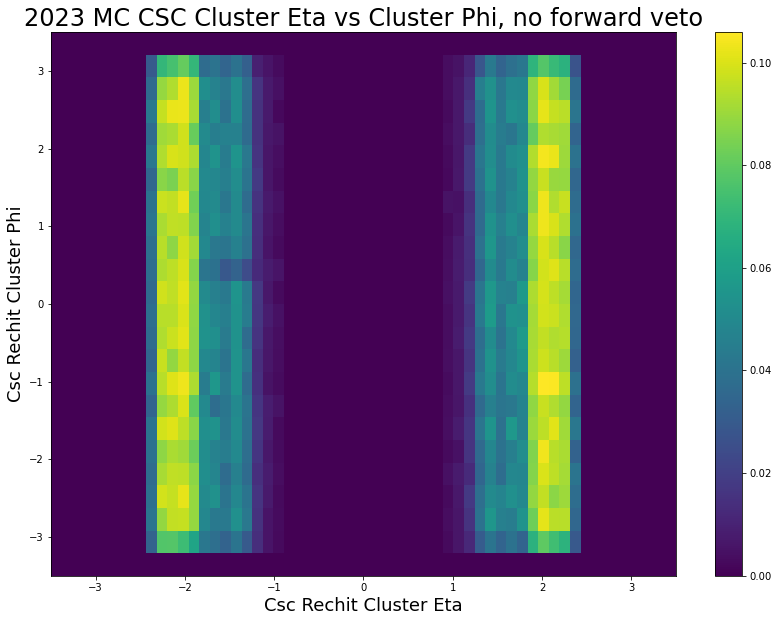

In [22]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2023"]
data_mask = makeEventMask("2023", events_data, [], [], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
#data_tree = data_tree[data_tree.cscRechitClusterTimeWeighted<-5]
data_runNum = data_tree["cscRechitClusterEta"]
data_timespread = data_tree["cscRechitClusterPhi"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5, 3.5, 60),np.linspace(-3.5,3.5,25)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Eta", fontsize=18)
plt.ylabel("Csc Rechit Cluster Phi", fontsize=18)
plt.title("2023 MC CSC Cluster Eta vs Cluster Phi, no forward veto", fontsize=24)

In [ ]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterPhi"]
data_timespread = data_tree["cscRechitClusterZ"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5,3.5,25),np.linspace(720,1100,200)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Phi", fontsize=18)
plt.ylabel("Csc Rechit Cluster Z", fontsize=18)
plt.title("2022 Data CSC  Cluster Phi vs Cluster Z, Positive Endcap", fontsize=24)

In [ ]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterEta"]
data_timespread = data_tree["cscRechitClusterZ"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(0.8,3,25),np.linspace(770,1100,200)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Eta", fontsize=18)
plt.ylabel("Csc Rechit Cluster Z", fontsize=18)
plt.title("2022 Data CSC  Cluster Eta vs Cluster Z, Positive Endcap", fontsize=24)

In [ ]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterPhi"]
data_timespread = data_tree["cscRechitClusterZ"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(1,3,25),np.linspace(-1100,-720,200)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Phi", fontsize=18)
plt.ylabel("Csc Rechit Cluster Z", fontsize=18)
plt.title("2022 Data CSC  Cluster Phi vs Cluster Z, Negative Endcap", fontsize=24)

### 2022EE

Text(0.5, 1.0, '2022EE Data CSC  Cluster Eta vs Cluster Phi')

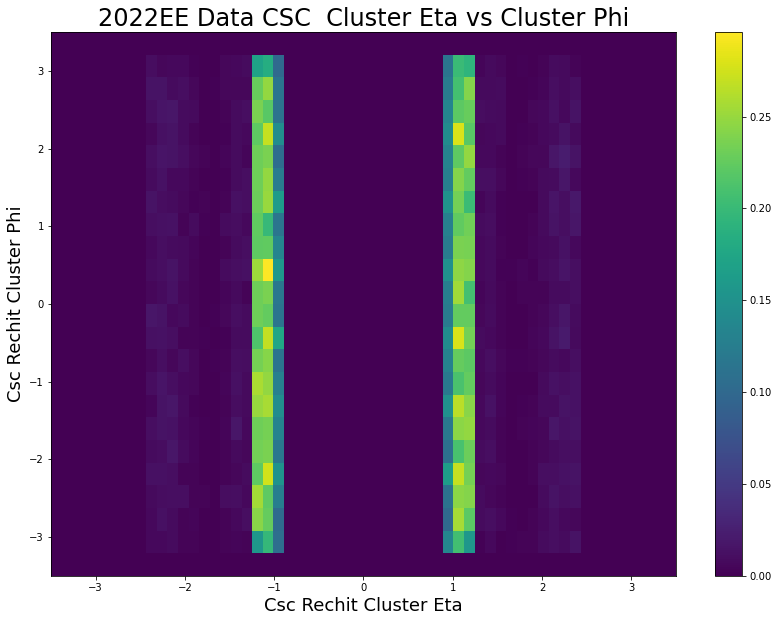

In [23]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022EE"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterEta"]
data_timespread = data_tree["cscRechitClusterPhi"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5, 3.5, 60),np.linspace(-3.5,3.5,25)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Eta", fontsize=18)
plt.ylabel("Csc Rechit Cluster Phi", fontsize=18)
plt.title("2022EE Data CSC  Cluster Eta vs Cluster Phi", fontsize=24)

Text(0.5, 1.0, '2022EE Data CSC  Cluster Phi vs Cluster Z, Positive Endcap')

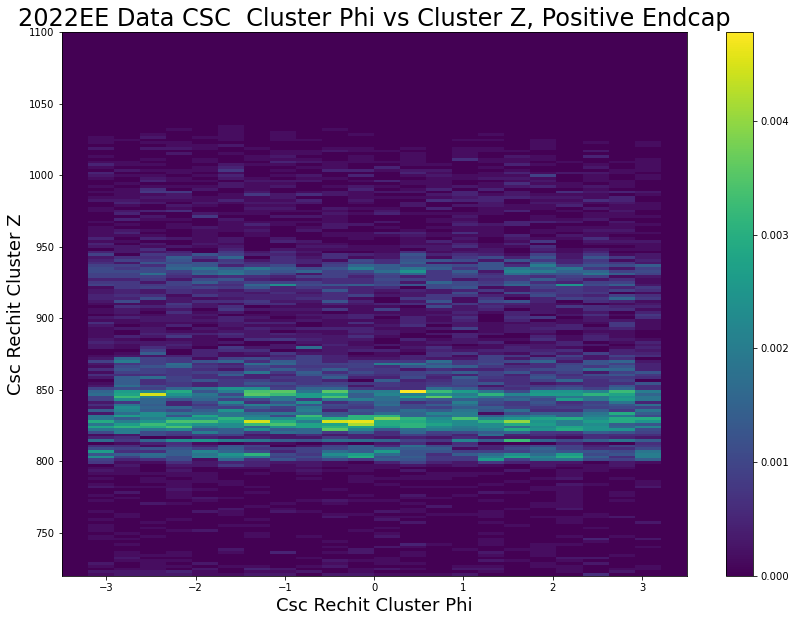

In [24]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022EE"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterPhi"]
data_timespread = data_tree["cscRechitClusterZ"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5,3.5,25),np.linspace(720,1100,200)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Phi", fontsize=18)
plt.ylabel("Csc Rechit Cluster Z", fontsize=18)
plt.title("2022EE Data CSC  Cluster Phi vs Cluster Z, Positive Endcap", fontsize=24)

In [ ]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2022EE"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterPhi"]
data_timespread = data_tree["cscRechitClusterZ"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(0,1,25),np.linspace(-1100,-720,200)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Phi", fontsize=18)
plt.ylabel("Csc Rechit Cluster Z", fontsize=18)
plt.title("2022EE Data CSC  Cluster Phi vs Cluster Z, Negative Endcap", fontsize=24)

Text(0.5, 1.0, '2023 Data CSC  Cluster Eta vs Cluster Phi')

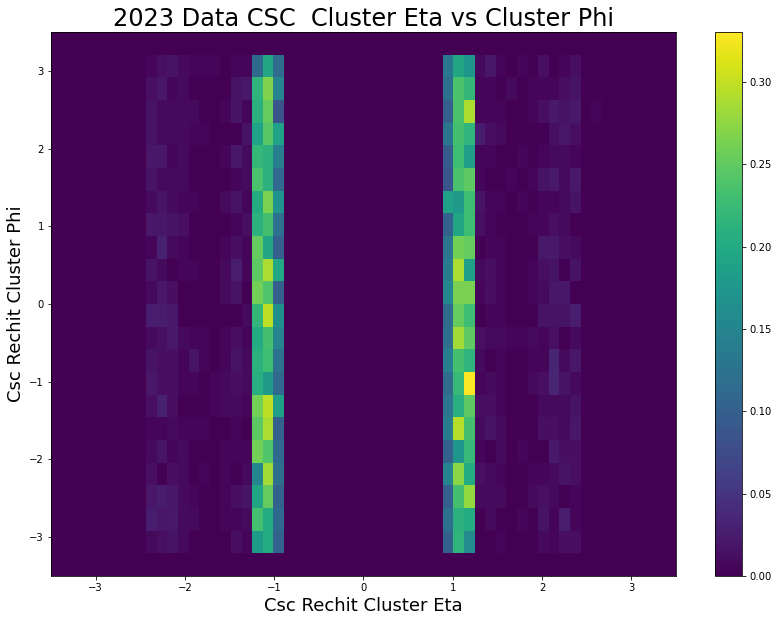

In [25]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2023"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterEta"]
data_timespread = data_tree["cscRechitClusterPhi"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5, 3.5, 60),np.linspace(-3.5,3.5,25)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Eta", fontsize=18)
plt.ylabel("Csc Rechit Cluster Phi", fontsize=18)
plt.title("2023 Data CSC  Cluster Eta vs Cluster Phi", fontsize=24)

Text(0.5, 1.0, '2023BPix Data CSC  Cluster Eta vs Cluster Phi')

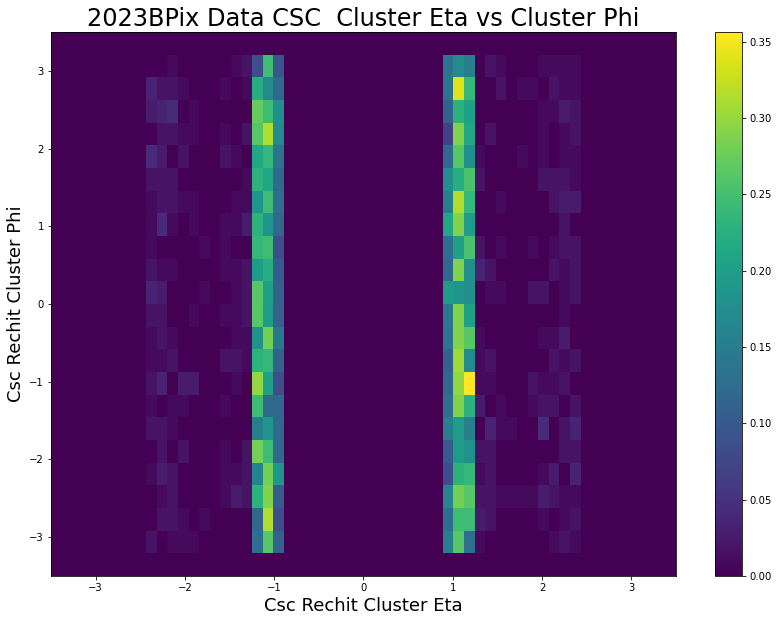

In [26]:
plt.figure(figsize=(14,10))
events_data = events_MC_dict["2023BPix"]
data_mask = makeEventMask(events_data, [], ["forward_veto"], True)
data_tree = events_data[data_mask]
data_tree = data_tree[~ak.is_none(data_tree)]
data_runNum = data_tree["cscRechitClusterEta"]
data_timespread = data_tree["cscRechitClusterPhi"]
plt.hist2d(data_runNum, data_timespread, bins=[np.linspace(-3.5, 3.5, 60),np.linspace(-3.5,3.5,25)], density=True)
plt.colorbar()
plt.xlabel("Csc Rechit Cluster Eta", fontsize=18)
plt.ylabel("Csc Rechit Cluster Phi", fontsize=18)
plt.title("2023BPix Data CSC  Cluster Eta vs Cluster Phi", fontsize=24)